# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.320  1  0.572 0.450 0.003   
                             age        0.069  1  0.123 0.726 0.001   
                             Kiel       1.953  1  3.494 0.063 0.018   
                             Magdeburg  5.022  1  8.987 0.003 0.045   
                             Sweden     8.029  1 14.368 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.042  1  0.044 0.834 0.000   
                             age        0.003  1  0.003 0.958 0.000   
                             Kiel       0.182  1  0.193 0.661 0.001   
                             Magdeburg  1.231  1  1.306 0.255 0.007   
                             Sweden    22.386  1 23.740 0.000 0.111   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.346  0.609    False  
                             age               0.139  0.833    False  
                             Kiel              1.200  0.147    False  
                             Magdeburg         2.511  0.013     True  
                             Sweden            3.696  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.079  0.905    False  
                             age               0.019  0.976    False  
                             Kiel              0.180  0.781    False  
                             Magdeburg         0.594  0.412    False  
                             Sweden            5.637  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.693  1  4.386 0.038 0.022   
                             age        0.020  1  0.126 0.723 0.001   
                             Kiel       0.439  1  2.780 0.097 0.014   
                             Magdeburg  0.904  1  5.723 0.018 0.029   
                             Sweden     2.335  1 14.786 0.000 0.072   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         3.357  1  1.628 0.203 0.008   
                             age        2.658  1  1.289 0.258 0.007   
                             Kiel      11.576  1  5.614 0.019 0.029   
                             Magdeburg 17.912  1  8.687 0.004 0.044   
                             Sweden     0.583  1  0.283 0.596 0.001   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.425  0.091    False  
                             age               0.141  0.817    False  
                             Kiel              1.013  0.192    False  
                             Magdeburg         1.752  0.049     True  
                             Sweden            3.785  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.691  0.337    False  
                             age               0.589  0.403    False  
                             Kiel              1.726  0.052    False  
                             Magdeburg         2.443  0.013     True  
                             Sweden            0.225  0.717    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.450         0.346  0.609    False   
                             age       0.726         0.139  0.833    False   
                             Kiel      0.063         1.200  0.147    False   
                             Magdeburg 0.003         2.511  0.013     True   
                             Sweden    0.000         3.696  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.834         0.079  0.905    False   
                             age       0.958         0.019  0.976    False   
                             Kiel      0.661         0.180  0.781    False   
                             Magdeburg 0.255         0.594  0.412    False   
                             Sweden    0.000         5.637  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.038         1.425  0.091    False  
                             age       0.723         0.141  0.817    False  
                             Kiel      0.097         1.013  0.192    False  
                             Magdeburg 0.018         1.752  0.049     True  
                             Sweden    0.000         3.785  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.203         0.691  0.337    False  
                             age       0.258         0.589  0.403    False  
                             Kiel      0.019         1.726  0.052    False  
                             Magdeburg 0.004         2.443  0.013     True  
                             Sweden    0.596         0.225  0.717    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.262         2.481     0.339     0.246         2.747     0.313
std       0.304         5.339     0.332     0.299         5.186     0.327
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.329     0.015     0.002         0.352     0.008
50%       0.122         0.914     0.244     0.092         1.036     0.184
75%       0.468         2.437     0.624     0.444         2.711     0.592
max       1.000       144.664     1.000     0.999        86.496     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.450         0.346   
A0A024R0T9;K7ER74;P02655                           AD     0.040         1.402   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.178         0.750   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.465         0.333   
A0A075B6H7                                         AD     0.114         0.942   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.027         1.567   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.433         0.363   
S4R3U6                                             AD     0.834         0.079   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.609    False   
A0A024R0T9;K7ER74;P02655                           AD      0.101    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.320    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.621    False   
A0A075B6H7                                         AD      0.233    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.075    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.183    False   
Q9Y6Y9                                             AD      0.595    False   
S4R3U6                                             AD      0.905    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.038         1.425   
A0A024R0T9;K7ER74;P02655                           AD     0.027         1.568   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.344         0.463   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.292         0.534   
A0A075B6H7                                         AD     0.097         1.015   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.041         1.387   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.534         0.272   
S4R3U6                                             AD     0.203         0.691   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.091    False  
A0A024R0T9;K7ER74;P02655                           AD      0.070    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.495    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.443    False  
A0A075B6H7                                         AD      0.191    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.253         1.409     0.336     0.248         1.500     0.321
std       0.290         1.641     0.317     0.290         1.792     0.316
min       0.000         0.002     0.000     0.000         0.001     0.000
25%       0.012         0.363     0.039     0.009         0.350     0.029
50%       0.124         0.905     0.247     0.103         0.986     0.201
75%       0.434         1.918     0.595     0.447         2.026     0.594
max       0.996        23.731     0.997     0.998        25.587     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1030,994


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.450         0.346  0.609   
A0A024R0T9;K7ER74;P02655                           0.040         1.402  0.101   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.178         0.750  0.320   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.465         0.333  0.621   
A0A075B6H7                                         0.114         0.942  0.233   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.027         1.567  0.075   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.183   
Q9Y6Y9                                             0.433         0.363  0.595   
S4R3U6                                             0.834         0.079  0.905   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.038   
A0A024R0T9;K7ER74;P02655                              False 0.027   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.344   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.292   
A0A075B6H7                                            False 0.097   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.041   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.534   
S4R3U6                                                False 0.203   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.425  0.091   
A0A024R0T9;K7ER74;P02655                                   1.568  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.463  0.495   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.534  0.443   
A0A075B6H7                                                 1.015  0.191   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.300   
Q9Y6X5                                                     1.387  0.097   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.272  0.667   
S4R3U6                                                     0.691  0.337   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    960
PI (yes) - QRILC (yes)   357
PI (no)  - QRILC (yes)    70
PI (yes) - QRILC (no)     34
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A075B6I0                                         0.020         1.707  0.058   
A0A075B6J9                                         0.027         1.566  0.076   
A0A087WWT2;Q9NPD7                                  0.044         1.359  0.109   
A0A087WXB8;Q9Y274                                  0.013         1.871  0.043   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A... 0.026         1.579  0.074   
...                                                  ...           ...    ...   
Q9NYX4                                             0.033         1.484  0.087   
Q9P0K9                                             0.036         1.443  0.094   
Q9UJ14                                             0.071         1.148  0.161   
Q9UKB5                                             0.014         1.841  0.046   
Q9UQ52                                             0.042         1.375  0.106   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A075B6I0                                            False 0.002   
A0A075B6J9                                            False 0.015   
A0A087WWT2;Q9NPD7                                     False 0.005   
A0A087WXB8;Q9Y274                                      True 0.151   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...    False 0.011   
...                                                     ...   ...   
Q9NYX4                                                False 0.008   
Q9P0K9                                                False 0.012   
Q9UJ14                                                False 0.012   
Q9UKB5                                                 True 0.084   
Q9UQ52                                                False 0.007   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A075B6I0                                                 2.717  0.008   
A0A075B6J9                                                 1.813  0.044   
A0A087WWT2;Q9NPD7                                          2.336  0.016   
A0A087WXB8;Q9Y274                                          0.820  0.269   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...         1.946  0.034   
...                                                          ...    ...   
Q9NYX4                                                     2.112  0.025   
Q9P0K9                                                     1.928  0.035   
Q9UJ14                                                     1.931  0.035   
Q9UKB5                                                     1.076  0.171   
Q9UQ52                                                     2.183  0.022   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A075B6I0                                             True       194  
A0A075B6J9                                             True       156  
A0A087WWT2;Q9NPD7                                      True       193  
A0A087WXB8;Q9Y274                                     False        89  
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...     True       166  
...                                                     ...       ...  
Q9NYX4                                                 True       195  
Q9P0K9                                                 True       192  
Q9UJ14                                                 True       169  
Q9UKB5                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.609,0.091,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.101,0.070,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.320,0.495,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.621,0.443,196,PI (no) - QRILC (no)
A0A075B6H7,0.233,0.191,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.300,197,PI (no) - QRILC (no)
Q9Y6X5,0.075,0.097,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.183,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.977,0.016,86,PI (no) - QRILC (yes),0.961
P63167;Q96FJ2,0.702,0.013,137,PI (no) - QRILC (yes),0.689
Q96EU7,0.668,0.013,142,PI (no) - QRILC (yes),0.656
Q8TEA8,0.037,0.631,56,PI (yes) - QRILC (no),0.594
A0A0J9YW36;Q9NZ72;Q9NZ72-2,0.037,0.595,92,PI (yes) - QRILC (no),0.558
...,...,...,...,...,...
Q8WYK1,0.037,0.050,109,PI (yes) - QRILC (no),0.013
D3DWX8;P98173;P98173-2;P98173-3;Q5HY75,0.040,0.054,116,PI (yes) - QRILC (no),0.013
Q14696,0.048,0.057,160,PI (yes) - QRILC (no),0.009


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


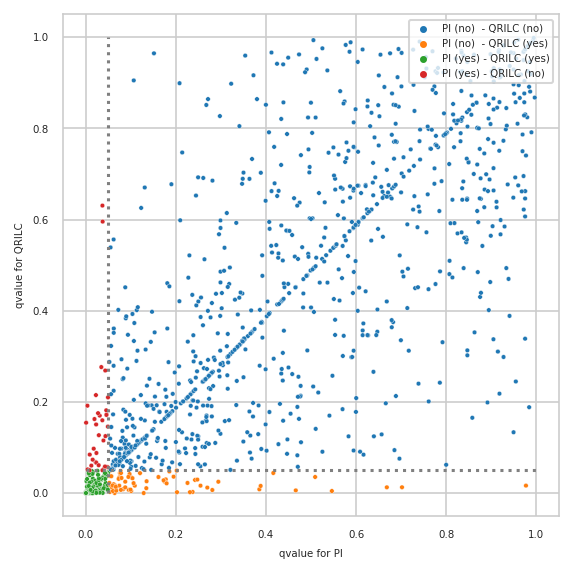

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


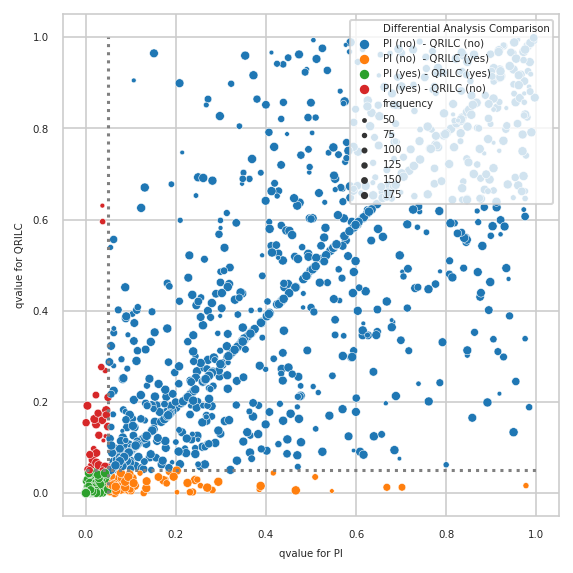

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.506


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out